In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("datasets_228_482_diabetes.csv",names=col_names,skiprows= 1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.shape

(768, 9)

In [10]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       146
           1       0.55      0.48      0.52        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231



In [26]:
# from sklearn.tree import export_graphviz
# import pydotplus
# from sklearn.externals.six import StringIO
# from IPython.display import Image 
import graphviz

In [37]:
# dot_data = export_graphviz(clf)
# graphviz.Source(export_graphviz(clf, out_file=dot_data,filled=True,
#                                 rounded=True,special_characters=True,feature_names = feature_cols
# #                                 ,class_names=['0','1']))
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# # graph.write_png('diabetes.png')
# Image(graph)

In [104]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8,random_state= 7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


In [41]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [44]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [46]:
parameter_candidates = [
  {'criterion': ["entropy", "gini"], 'max_depth': np.arange(1,11)}]

In [100]:
clf = DecisionTreeClassifier(random_state= 7)

In [101]:
gridd = GridSearchCV(clf, param_grid=parameter_candidates)
gridd.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=7, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([ 1,  2,  3,  4,  5

In [102]:
gridd.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [103]:
gridd.best_score_

0.74312911041883

In [106]:
iris = datasets.load_iris()

In [107]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [108]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [109]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [115]:
clff=RandomForestClassifier(n_estimators=100)
clff.fit(X_train,y_train)
y_pred=clff.predict(X_test)

In [116]:
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

In [117]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [118]:
clff.predict([[3, 5, 4, 2]])

array([1])

In [119]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.462301
petal width (cm)     0.433473
sepal length (cm)    0.086059
sepal width (cm)     0.018166
dtype: float64

No handles with labels found to put in legend.


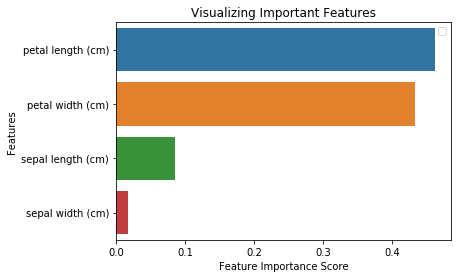

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()